### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Xuewei Huang

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - requests, BeautifulSoup, pandas, json, time, copy, GooglePlaces(from googleplaces import GooglePlaces), googlemaps, sqlite3, argparse
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/xueweih/inf510_project and read the README.txt which will tell you how to get data and get data analysis.

*****Please install two packages before running my program.

            pip install python-google-places 

            pip install -U googlemaps 

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The code takes a while (about 30-35min) to get the data from web when using '--source == remote'. And if we run the code more than once, for example, '--source == remote' for the first time, '--source == lcoal' for the second time, ect., we need to delete the csv files and db file by hand each time. 

4.  **Anything else you feel is relevant to the grading of your project your project.**

    If the packages that are not a standard part of the Ananconda distribution cannot be installed in the correct path, or cannot installed successfully, then part of the codes that need to import the packages may not work. For example, there are three versions of python on my Mac, so it is important to install the packages correctly.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    I set out to compare the houses from airbnb and the hotels from agoda and make a decision to choose house or hotel. I have detailed statements in milestone 1 assignment. But as the project approaches, there are some changes: 
    
    Firstly, 100 data is too small, so I extend it to 200.
    
    Secondly, airbnb doesn't have monthly booking numbers. So I cannot scrape the monthly booked numbers of the houses. As a result, there remains price, rating, number of reviews, which can be calculated to get final scores.


6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    I thought that airbnb and agoda may have similar scores. But actually, airbnb has a large advantage based on its price. So the result is no surprising. Airbnb performs better agoda overwhelmly.

7. **What difficulties did you have in completing the project?**  

    (a) It was somewhat difficult to get data from the websites. Because the html codes of the websites that I wanted to scrape are not so standard. For instance, the html files of the first page and the last pages have a little bit difference, so I need to scrape in different ways under different circumstances. And if I don't use sleep function, it may scrape the same data repeatly.
    
    (b) I cannot get the exact price of the hotel or house, because the displayed price doesn't include tax, resort fee, clean fee, ect.. What I could do was to scrape the displayed prices of the hotels and houses. It may cause bias to my results.

8. **What skills did you wish you had while you were doing the project?**

    I hope I can use selenium to scrape the data, in which way I don't have to set the date, number of guests and destination to search. I have almost done the Search Simulation programming, but there was something wrong with the date picker. So I dropped selenium. Although the function did work, the date was not set correctly. Anyway, I have learned how to simulate searching process or login process. 
    
    I have got a basic knowledge of scraping data.


9. **What would you do “next” to expand or augment the project?**

    If I had to continue the project, I want to solve the date picker problem and use selenium to set conditions in the home page. Then I can use the url of the home page instead of the first page skipped from the home page after I set 'date', 'destination' and 'guests'.

In [514]:
import Data_Analysis

In [515]:
obj = Data_Analysis.data_analysis()
f1, f2, f3, f4 = obj.import_csv()

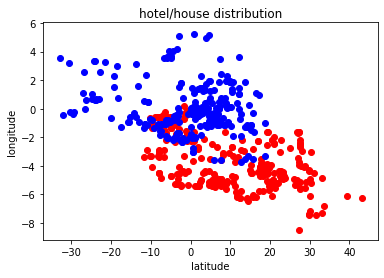

In [516]:
lat_lng_agoda, lat_lng_airbnb = obj.hotel_house_distribution(f3, f4)

There are some deviations between hotel distribution and house distribution. So we can only choose hotel or house in some particular district.

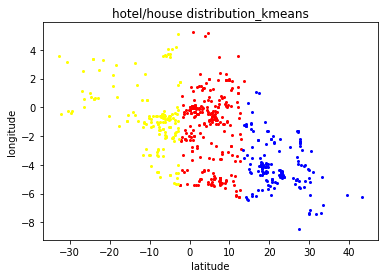

In [517]:
new_f3, new_f4 = obj.kmeans_scatter(lat_lng_agoda, lat_lng_airbnb, f3, f4)

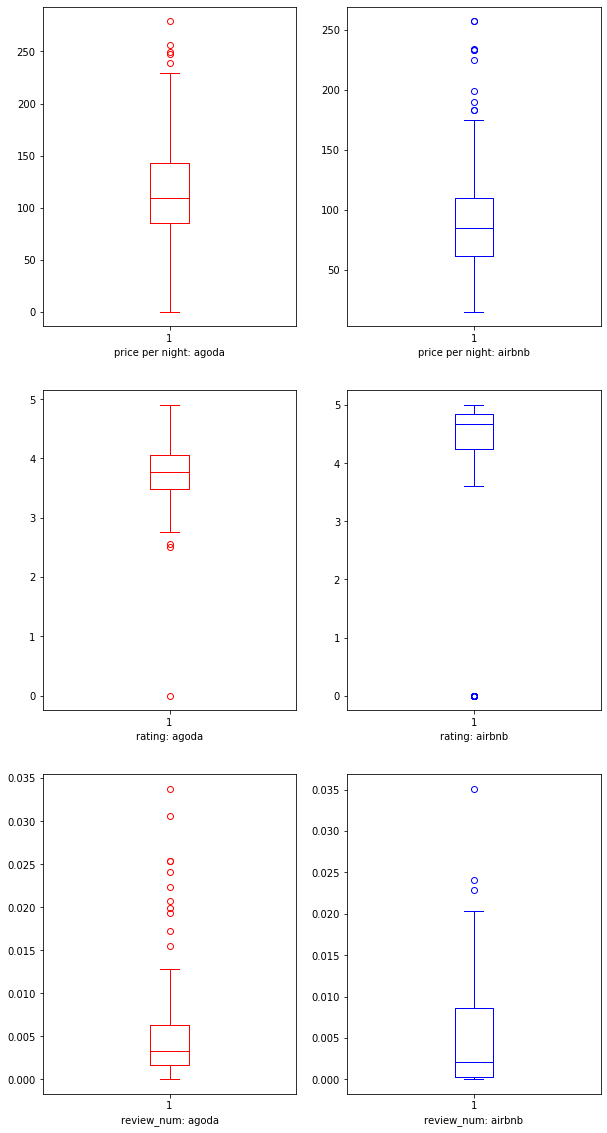

In [518]:
agoda_all_1, airbnb_all_1 = obj.original_plots(f1, f2, new_f3, new_f4)


It is obvious that agoda has a generally higher price than airbnb. 
But when it comes to rating and number of reviews, airbnb performs better than agoda.


How to get the final score:

Firstly, sort all the samples by the values of price in a desending order. Reset index and add the index to score.
Secondly, sort all the samples by the values of rating in an ascending order. Reset index and add the index to score.
Thirdly, sort all the samples by the values of review number in an ascending order. Reset index and add the index to score.
Finally, now we get final score and sort all the samples by the values of score in an ascending order.

In [519]:
mean_1_ago, mean_1_air, mean_2_ago, mean_2_air, mean_3_ago, mean_3_air, ago_air_concat_score = obj.get_final_score(agoda_all_1, airbnb_all_1)

In [520]:
print('average score of agoda(cluster1):', mean_1_ago,'\n'
      'average score of airbnb(cluster1):', mean_1_air,'\n'
      'average score of agoda(cluster2):', mean_2_ago,'\n' 
      'average score of airbnb(cluster2):', mean_2_air,'\n' 
      'average score of agoda(cluster3):', mean_3_ago,'\n'
      'average score of airbnb(cluster3):', mean_3_air)

average score of agoda(cluster1): 565.8833333333333 
average score of airbnb(cluster1): 685.099173553719 
average score of agoda(cluster2): 490.0851063829787 
average score of airbnb(cluster2): 741.4666666666667 
average score of agoda(cluster3): 514.6304347826087 
average score of airbnb(cluster3): 651.359375


We can see that airbnb performs better than agoda on the whole.

In [521]:
ago_air_concat_score

,id,name,price_per_night,rating,review_num,url,lat_lng,address,clstr,plf,score
0,40448691,"5 min to LAX, Private Entrance, Studio Apartment",160.0,0.00,0.000000,https://www.airbnb.com/rooms/40766094?location...,"(34.09888, -118.34246)","7020 Lanewood Ave, Los Angeles, CA 90028, USA",0.0,air,48
1,10191486,Luxurious Downtown LA 1-2 BD Suites,194.0,0.00,0.000000,https://agoda.com/luxurious-downtown-la-1-2-bd...,"(34.054154135598324, -118.26191957313995)","6th / Bixel, Los Angeles, CA 90017, USA",1.0,ago,69
2,17703811,*New Listing* Private GuestHouse with Kitchen&...,150.0,0.00,0.000539,https://www.airbnb.com/rooms/14054436?location...,"(33.79705, -118.20271)","2191 Golden Ave, Long Beach, CA 90806, USA",2.0,air,144
3,14054436,Eclectic 1-Bedrm Hollywood rock star apt! (235),127.0,0.00,0.000240,https://www.airbnb.com/rooms/40007705?location...,"(34.12863, -118.07007)","9105 E Fairview Ave, San Gabriel, CA 91775, USA",0.0,air,148
4,14805561,700Sqft Venice Apartment,115.0,0.00,0.000000,https://www.airbnb.com/rooms/40753983?location...,"(34.03542, -118.28244)","1042 W 22nd St, Los Angeles, CA 90007, USA",0.0,air,165
...,...,...,...,...,...,...,...,...,...,...,...
395,22498768,Southbay Hideaway: Garden Oasis featuring hot ...,56.0,4.79,0.017374,https://www.airbnb.com/rooms/40241031?location...,"(33.98388, -117.85749)","20514 Missionary Ridge St, Walnut, CA 91789, USA",2.0,air,1060
396,28913346,700Sqft Venice Apartment,65.0,4.85,0.022885,https://www.airbnb.com/rooms/3304088?location=...,"(34.08812, -118.308)","965 N Oxford Ave, Los Angeles, CA 90029, USA",0.0,air,1066
397,15165198,Private Room in WeHo Hills!,50.0,4.84,0.013420,https://www.airbnb.com/rooms/15165198?location...,"(34.00187, -118.45428)","1251 Palms Blvd, Venice, CA 90291, USA",2.0,air,1080
398,19123987,Touch of Big Sur near Venice Beach,44.0,4.86,0.017853,https://www.airbnb.com/rooms/16493077?location...,"(34.10976, -118.25989)","2901 Acresite St, Los Angeles, CA 90039, USA",0.0,air,1108


In [522]:
ago_air_concat_score.iloc[-1, 1]

'A Sound Sleep on Kingsize Bed with inside Bathroom'

The best choice among the 400 samples is 'A Sound Sleep on Kingsize Bed with inside Bathroom' from airbnb.